In [1]:
import pandas as pd 

tmp = pd.read_csv("../data/T6_2_ROOT.DAT", sep=' ')

In [3]:
tmp.head()

,n,s1,s2,p1,p2
0,1,1.11,2.569,3.58,0.760
1,1,1.19,2.928,3.75,0.821
2,1,1.09,2.865,3.93,0.928
3,1,1.25,3.844,3.94,1.009
4,1,1.11,3.027,3.60,0.766


In [9]:
tmp.iloc[2, 1]

1.09

In [ ]:
import numpy as np

root = pd.read_csv("../data/T6_2_ROOT.DAT", sep=' ', names=['Tree.Number', 'Trunk.Girth.4.Years', 'Ext.Growth.4.Years', 'Trunk.Girth.15.Years', 'Weight.Above.Ground.15.Years'])

In [ ]:
R=root.iloc[:, 1:5].corr().values

In [ ]:
R

In [ ]:
n = R.shape[0]

In [ ]:
Rn = np.linalg.solve(R, np.identity(n))

In [ ]:
smc = 1 - 1/np.diag(Rn)

In [ ]:
smc

In [ ]:
di = np.diag_indices(n)

In [ ]:
R[di] = smc

In [ ]:
R

In [ ]:
w, v = np.linalg.eig(R)

In [ ]:
w

In [ ]:
v

In [ ]:
totprop = 0
for i in w:
    totprop += i / np.sum(w)
    print(totprop)

In [ ]:
lam = v[:,:2]@np.diag(np.sqrt(w[:2]))

In [ ]:
lam**2

In [ ]:
h2 = np.sum(lam**2, axis=1)

In [ ]:
h2

In [ ]:
u2 = 1 -  h2

In [ ]:
com = np.sum(lam**2, axis=1)**2 / np.sum(lam**4, axis=1)

In [ ]:
com

In [ ]:
corpa = pd.DataFrame(np.column_stack((np.round(lam[:,0], 2),
                      np.round(lam[:,1], 2),
                      np.round(h2, 2),
                      np.round(u2, 3),
                      np.round(com, 1))),
                      columns=['PA1', 'PA2', 'h2', 'u2', 'com'])

In [ ]:
corpa

varimax matrix rotation from wikipedia https://en.wikipedia.org/wiki/Talk:Varimax_rotation

In [ ]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from scipy import eye, asarray, dot, sum
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = np.linalg.svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)


In [ ]:
varimax(lam[:,0:2])

## Factor Analysis

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("../data/bfi.csv", index_col=0, header=0)

In [6]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [7]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [9]:
# Dropping missing values rows
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
A1    2436 non-null float64
A2    2436 non-null float64
A3    2436 non-null float64
A4    2436 non-null float64
A5    2436 non-null float64
C1    2436 non-null float64
C2    2436 non-null float64
C3    2436 non-null float64
C4    2436 non-null float64
C5    2436 non-null float64
E1    2436 non-null float64
E2    2436 non-null float64
E3    2436 non-null float64
E4    2436 non-null float64
E5    2436 non-null float64
N1    2436 non-null float64
N2    2436 non-null float64
N3    2436 non-null float64
N4    2436 non-null float64
N5    2436 non-null float64
O1    2436 non-null float64
O2    2436 non-null int64
O3    2436 non-null float64
O4    2436 non-null float64
O5    2436 non-null float64
dtypes: float64(24), int64(1)
memory usage: 494.8 KB


In [11]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086924, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8485397221949221

In [15]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

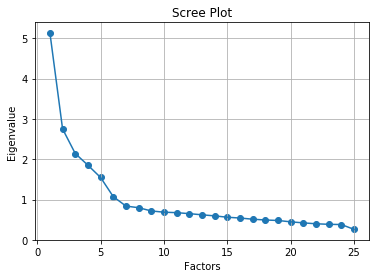

In [17]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

In [23]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

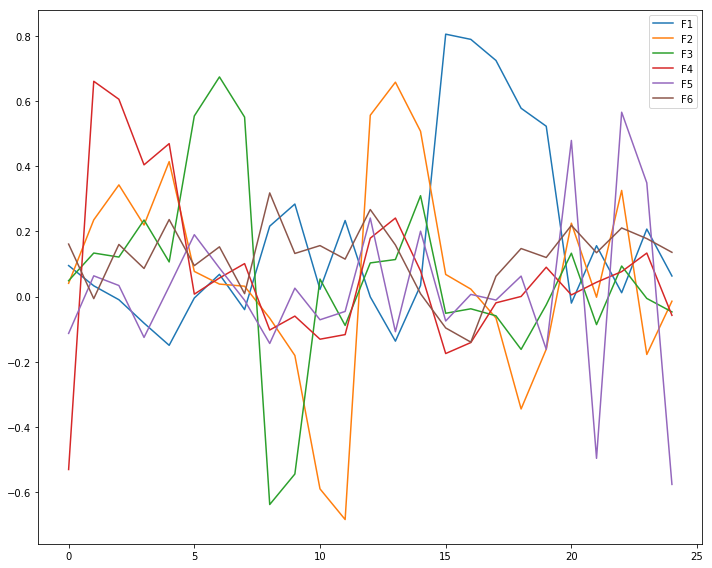

In [35]:
fig, ax = plt.subplots(figsize=(10,8))

for i in range(6):
    ax.plot(fa.loadings_[:,i], label='F'+str(i+1))
ax.legend()
fig.tight_layout()
plt.show()

F6 is not very obvious, should use five factors

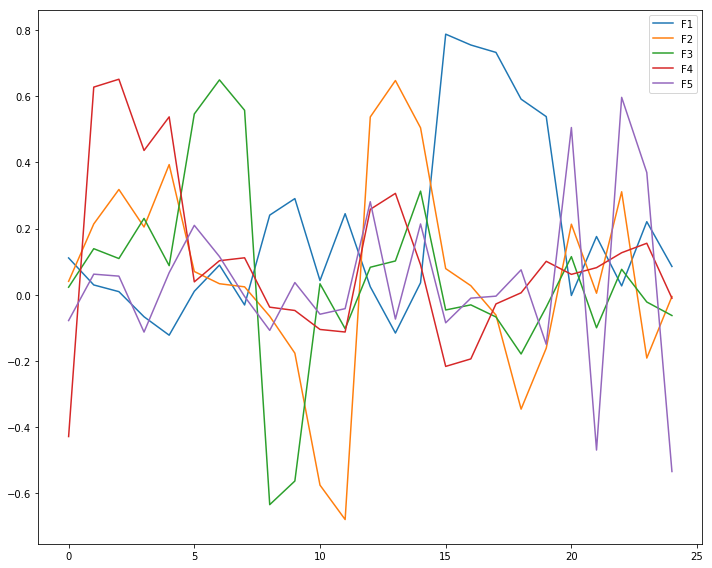

In [38]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(df)

fig, ax = plt.subplots(figsize=(10,8))

for i in range(5):
    ax.plot(fa.loadings_[:,i], label='F'+str(i+1))
ax.legend()
fig.tight_layout()
plt.show()

Using abs value to plot the loading is more meaningful

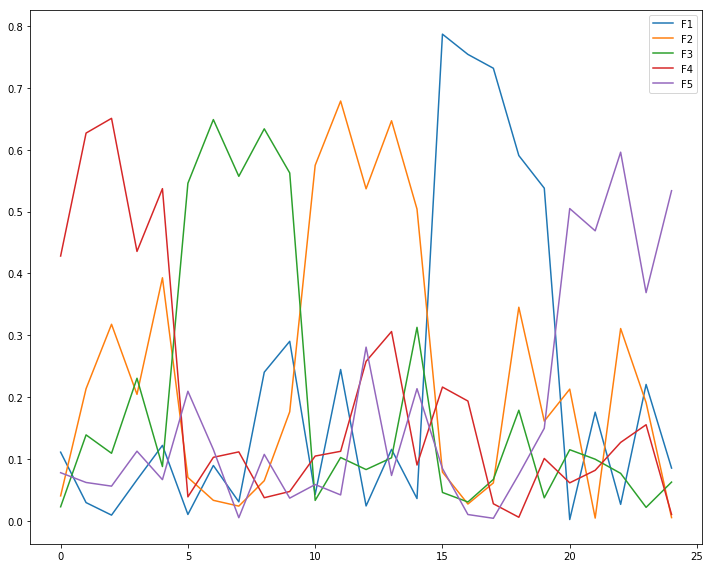

In [39]:
import numpy as np

fig, ax = plt.subplots(figsize=(10,8))

for i in range(5):
    ax.plot(np.abs(fa.loadings_[:,i]), label='F'+str(i+1))
ax.legend()
fig.tight_layout()
plt.show()

In [49]:
# Get variance of each factors
fvar = fa.get_factor_variance()
fvDf = pd.DataFrame({'SS Loadings':fvar[0], 'Proportion Var':fvar[1], 'Cumulative Var':fvar[2]})

fvDf

,Cumulative Var,Proportion Var,SS Loadings
0,0.108385,0.108385,2.709633
1,0.207309,0.098924,2.473090
2,0.288953,0.081644,2.041106
3,0.362733,0.073780,1.844498
4,0.423619,0.060886,1.522153


Total 42% cumulative Variance explained by the 5 factors.